In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd # Import the pandas library and assign it the alias 'pd'

iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names) # Correct the typo from 'daframe' to 'DataFrame'
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Corrected import statement
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_scaled)
X_pca = pca.fit_transform(X_scaled)

# Importing KMeans (assuming it was intended to be used)
from sklearn.cluster import KMeans

k=3
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(X_pca)

labels = kmeans.labels_


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
new_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
new_df['Cluster'] = labels
new_df.head()


,PC1,PC2,Cluster
0,-2.264703,0.480027,1
1,-2.080961,-0.674134,1
2,-2.364229,-0.341908,1
3,-2.299384,-0.597395,1
4,-2.389842,0.646835,1


# Sección nueva

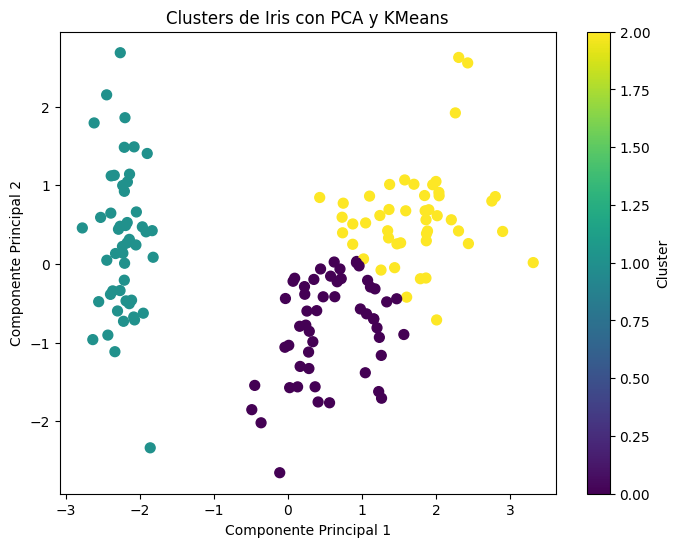

In [ ]:
import matplotlib.pyplot as plt

# Asumiendo que ya tienes 'X_pca' y 'labels' del código anterior
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50)
plt.title('Clusters de Iris con PCA y KMeans')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Cluster')
plt.show()